# Tensorflow Demo
 - 텐서플로 기초 실습
 > - https://github.com/hunkim/DeepLearningZeroToAll
  - https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/
  - https://r2rt.com/implementing-batch-normalization-in-tensorflow.html

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BTCC_V1.csv')
df.head()

,FI,CD1,CD2,CD,PBCD1,PTCD1,PTHK1,PRTCD1,PRTHK1,HOBCD,...,HOBCD2,MASS,HCBCD,HCBCD1,HCTCD,HCTCD1,HCSBCD,HCSBCD1,HCSTCD,HCSTCD1
0,fail,34.9425,35.6025,35.6278,30.6582,38.6019,561.1833,42.3682,83.7271,42.6770,...,41.5053,110.3844,30.1095,30.9911,23.4901,24.1715,41.2705,40.3889,48.0099,47.3285
1,fail,35.6638,36.1613,35.8333,31.7862,39.3942,552.6281,43.6462,74.3360,43.4857,...,42.7702,103.7295,30.6316,31.4769,23.0485,23.1552,40.7484,39.9031,48.4515,48.3448
2,fail,35.2700,36.0663,35.8722,34.0681,38.3055,491.2524,45.9181,76.8525,42.6932,...,42.2894,109.1334,30.4984,31.3457,23.5710,23.3318,40.8816,40.0343,47.8590,48.0982
3,fail,35.8425,36.5638,35.9178,32.0579,39.1814,559.7655,43.9179,72.5450,43.5031,...,42.7449,103.4710,30.7320,31.7229,22.8302,22.8603,40.6480,39.6571,48.6698,48.6397
4,fail,36.0075,36.6700,35.9756,30.0913,38.4956,554.2275,41.5613,74.0503,42.1310,...,41.5634,107.9101,31.2028,31.8770,23.4003,23.2335,40.1772,39.5030,48.1597,48.3265


In [3]:
import tensorflow as tf
tf.__version__
## '1.4.0'

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.4.0'

In [4]:
# 피처 데이터, 레이블, 미니배치 갯수, random sampling
import random
def getMiniBatch2(x, y, n):
    assert len(x) >= n
    if len(x) != len(y):
        print('Feature and label num is not equal.')
        return
    rand_idx = random.sample(list(range(len(x))), n)
    x_ = [x[i] for i in rand_idx]
    y_ = [y[i] for i in rand_idx]
    return x_, y_

In [5]:
import numpy as np

In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
tmp = []
for i in df['FI']:
    y=[]
    if i == 'fail': y=[1,0]
    else: y=[0,1]
    tmp.append(y)
df['y'] = tmp

In [8]:
df.head()

,FI,CD1,CD2,CD,PBCD1,PTCD1,PTHK1,PRTCD1,PRTHK1,HOBCD,...,MASS,HCBCD,HCBCD1,HCTCD,HCTCD1,HCSBCD,HCSBCD1,HCSTCD,HCSTCD1,y
0,pass,36.4225,36.4675,37.0511,30.8555,39.0031,551.4198,42.1155,80.0285,43.2955,...,109.6583,30.5914,31.7859,23.3431,22.8038,40.7886,39.5941,48.1569,48.6962,"[0, 1]"
1,pass,36.3013,36.9963,36.6156,30.2441,39.5035,555.3825,41.6241,81.3669,42.2831,...,109.6175,30.4597,30.5495,24.2333,25.9690,40.9203,40.8305,47.3767,45.6410,"[0, 1]"
2,pass,36.6875,37.3538,36.8367,30.9095,37.9498,557.9170,42.6195,82.5036,42.8688,...,109.9489,30.9015,31.6972,23.0838,22.7425,40.4785,39.6828,48.5762,48.9175,"[0, 1]"
3,fail,37.4400,38.5525,37.1333,30.1995,38.9656,560.2790,41.9095,80.1773,42.9534,...,109.0039,30.6956,31.7909,22.9809,22.6807,40.6844,39.5891,48.3191,48.6193,"[1, 0]"
4,pass,36.9438,37.5763,36.8022,31.1211,39.2057,560.4731,42.5511,81.9512,42.9143,...,109.2756,30.3826,30.7916,23.9249,24.8209,40.9974,40.5884,47.5751,46.6791,"[0, 1]"


In [94]:
split_ratio = 0.8
split_index = int(len(df)*split_ratio)

x_train = (df.iloc[:, 4:21])[:split_index]
y_train = df['CD'][:split_index]
y_train = [[i] for i in y_train]

x_test = (df.iloc[:, 4:21])[split_index:]
y_test = df['CD'][split_index:]
y_test = [[i] for i in y_test]

In [95]:
x_test = x_test.as_matrix()
y_test = list(y_test)

In [96]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

815 204 815 204


In [97]:
df.shape

(1019, 22)

In [99]:
tf.reset_default_graph()
# parameters
learning_rate = 0.001
training_epochs = 300
# use mini batch
batch_size = 50

# input place holders
X = tf.placeholder(tf.float32, [None, 17]) #[100, 784]
Y = tf.placeholder(tf.float32, [None, 1]) #[100, 10]
keep_prob = tf.placeholder(tf.float32) # 뉴런을 켤 확률

# # weights & bias for nn hidden layers
# # 1-hidden layer
# W1 = tf.Variable(tf.random_normal([17, 512])) #[784, 256]
# b1 = tf.Variable(tf.random_normal([512]))
# L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal([512, 2]))
# b2 = tf.Variable(tf.random_normal([2]))
# hypothesis = tf.matmul(L1, W2) + b2

W1 = tf.get_variable(name="weight_1", shape=[17, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# W2 = tf.Variable(tf.random_normal([256, 256]))
W2 = tf.get_variable(name='weight_2', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
# add Dropout
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# W3 = tf.Variable(tf.random_normal([256, 10]))
W3 = tf.get_variable(name='weight_3', shape=[256, 1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]))
# softmax function
hypothesis = tf.matmul(L2, W3) + b3


# 2-hidden layers
# W1 = tf.Variable(tf.random_normal([17, 256]))
# b1 = tf.Variable(tf.random_normal([256]))
# L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal([256, 256]))
# b2 = tf.Variable(tf.random_normal([256]))
# L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# W3 = tf.Variable(tf.random_normal([256, 2]))
# b3 = tf.Variable(tf.random_normal([2]))
# hypothesis = tf.matmul(L2, W3) + b3

# # 3-hidden layers
# W1 = tf.Variable(tf.random_normal([784, 256]))
# b1 = tf.Variable(tf.random_normal([256]))
# L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# W2 = tf.Variable(tf.random_normal([256, 256]))
# b2 = tf.Variable(tf.random_normal([256]))
# L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

# W3 = tf.Variable(tf.random_normal([256, 256]))
# b3 = tf.Variable(tf.random_normal([256]))
# L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

# W4 = tf.Variable(tf.random_normal([256, 10]))
# b4 = tf.Variable(tf.random_normal([10]))
# hypothesis = tf.matmul(L3, W4) + b4


# define cost/loss & optimizer
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#     logits=hypothesis, labels=Y))
# for regression
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# predicted = tf.argmax(hypothesis, 1)  # [0,0,0,1,0....]--> [3]
# accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

In [100]:
%%time
# initialize session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# for plotting
x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]

total_iter = int(df.shape[0]/batch_size*training_epochs)
print('Total step:', total_iter)

for i in range(total_iter):
#     batch = mnist.train.next_batch(batch_size)
#     batch_x, batch_y = getMiniBatch2(x_train.as_matrix(), list(y_train), batch_size)
    batch_x = x_train.as_matrix()
    batch_y = list(y_train)
    optimizer.run(feed_dict={X: batch_x, Y: batch_y, keep_prob:0.5})

    if i % 20 == 0:   
#         train_accuracy = accuracy.eval(feed_dict={X:batch_x, Y:batch_y, keep_prob:0.5})
#         val_accuracy = accuracy.eval(feed_dict={X:x_test, Y:y_test, keep_prob:1})
        cost_ = cost.eval(feed_dict={X:x_test, Y:y_test, keep_prob:1})
        print('step %d: acc_tr %g, acc_tt %g, cost %g' % (i, train_accuracy, val_accuracy, cost_))

        # for plotting
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(cost_)
        x_range.append(i)

print('--------------------------')
print('Learning Finished!')

# # Test model and check accuracy
# print('Accuracy:', sess.run(accuracy, feed_dict={
#       X: mnist.test.images, Y: mnist.test.labels}))

# # Get one and predict
# r = random.randint(0, mnist.test.num_examples - 1)
# print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
# print("Prediction: ", sess.run(
#     tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Total step: 6114
step 0: acc_tr 0.704295, acc_tt 0.691176, cost 9.14192e+07
step 20: acc_tr 0.704295, acc_tt 0.691176, cost 2.53622e+22
step 40: acc_tr 0.704295, acc_tt 0.691176, cost 2.34104e+22
step 60: acc_tr 0.704295, acc_tt 0.691176, cost 2.16088e+22
step 80: acc_tr 0.704295, acc_tt 0.691176, cost 1.99459e+22
step 100: acc_tr 0.704295, acc_tt 0.691176, cost 1.84109e+22
step 120: acc_tr 0.704295, acc_tt 0.691176, cost 1.6994e+22
step 140: acc_tr 0.704295, acc_tt 0.691176, cost 1.56862e+22
step 160: acc_tr 0.704295, acc_tt 0.691176, cost 1.4479e+22
step 180: acc_tr 0.704295, acc_tt 0.691176, cost 1.33648e+22
step 200: acc_tr 0.704295, acc_tt 0.691176, cost 1.23363e+22
step 220: acc_tr 0.704295, acc_tt 0.691176, cost 1.13869e+22
step 240: acc_tr 0.704295, acc_tt 0.691176, cost 1.05106e+22
step 260: acc_tr 0.704295, acc_tt 0.691176, cost 9.7017e+21
step 280: acc_tr 0.704295, acc_tt 0.691176, cost 8.95508e+21
step 300: acc_tr 0.704295, acc_tt 0.691176, cost 8.26592e+21
step 320: acc_tr

step 2680: acc_tr 0.704295, acc_tt 0.691176, cost 6.00715e+17
step 2700: acc_tr 0.704295, acc_tt 0.691176, cost 5.54485e+17
step 2720: acc_tr 0.704295, acc_tt 0.691176, cost 5.11813e+17
step 2740: acc_tr 0.704295, acc_tt 0.691176, cost 4.72426e+17
step 2760: acc_tr 0.704295, acc_tt 0.691176, cost 4.36069e+17
step 2780: acc_tr 0.704295, acc_tt 0.691176, cost 4.0251e+17
step 2800: acc_tr 0.704295, acc_tt 0.691176, cost 3.71534e+17
step 2820: acc_tr 0.704295, acc_tt 0.691176, cost 3.42941e+17
step 2840: acc_tr 0.704295, acc_tt 0.691176, cost 3.16549e+17
step 2860: acc_tr 0.704295, acc_tt 0.691176, cost 2.92188e+17
step 2880: acc_tr 0.704295, acc_tt 0.691176, cost 2.69702e+17
step 2900: acc_tr 0.704295, acc_tt 0.691176, cost 2.48947e+17
step 2920: acc_tr 0.704295, acc_tt 0.691176, cost 2.29788e+17
step 2940: acc_tr 0.704295, acc_tt 0.691176, cost 2.12104e+17
step 2960: acc_tr 0.704295, acc_tt 0.691176, cost 1.95781e+17
step 2980: acc_tr 0.704295, acc_tt 0.691176, cost 1.80714e+17
step 3000

step 5360: acc_tr 0.704295, acc_tt 0.691176, cost 1.31332e+13
step 5380: acc_tr 0.704295, acc_tt 0.691176, cost 1.21225e+13
step 5400: acc_tr 0.704295, acc_tt 0.691176, cost 1.11896e+13
step 5420: acc_tr 0.704295, acc_tt 0.691176, cost 1.03284e+13
step 5440: acc_tr 0.704295, acc_tt 0.691176, cost 9.53359e+12
step 5460: acc_tr 0.704295, acc_tt 0.691176, cost 8.79991e+12
step 5480: acc_tr 0.704295, acc_tt 0.691176, cost 8.12269e+12
step 5500: acc_tr 0.704295, acc_tt 0.691176, cost 7.49759e+12
step 5520: acc_tr 0.704295, acc_tt 0.691176, cost 6.92059e+12
step 5540: acc_tr 0.704295, acc_tt 0.691176, cost 6.388e+12
step 5560: acc_tr 0.704295, acc_tt 0.691176, cost 5.89639e+12
step 5580: acc_tr 0.704295, acc_tt 0.691176, cost 5.44262e+12
step 5600: acc_tr 0.704295, acc_tt 0.691176, cost 5.02377e+12
step 5620: acc_tr 0.704295, acc_tt 0.691176, cost 4.63715e+12
step 5640: acc_tr 0.704295, acc_tt 0.691176, cost 4.28029e+12
step 5660: acc_tr 0.704295, acc_tt 0.691176, cost 3.95089e+12
step 5680:

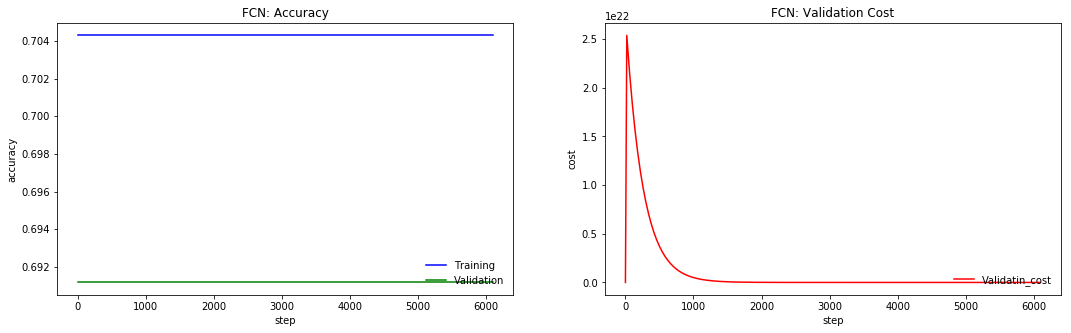

In [101]:
# plot learning result
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('FCN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('FCN: Validation Cost')
plt.show()

In [75]:
batch_x, batch_y = getMiniBatch2(x_train.as_matrix(), list(y_train), batch_size)
print(sum([i[1] for i in batch_y]))

36


In [78]:
715/1019

0.7016683022571149

In [77]:
df.shape

(1019, 22)

In [76]:
print(sum([i[1] for i in df['y']]))

715


In [86]:
pp = predicted.eval(feed_dict={X:x_test, Y:y_test, keep_prob:1})
print(pp)
pp2 = predicted.eval(feed_dict={X: batch_x, Y: batch_y, keep_prob:1})
print(pp2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1